<a href="https://colab.research.google.com/github/bhavepurva/MNIST-Classification-CLothes-Digits/blob/main/digits%2Cclothes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

313/313 [==============================] - 1s 1ms/step - loss: 0.4734 - accuracy: 0.8342

Test accuracy: 0.8342000246047974


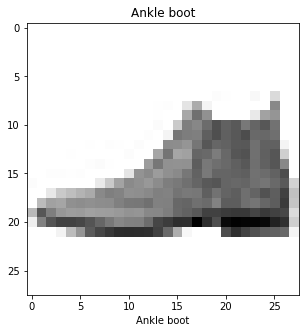

In [1]:
#clothes classification

#imports
import tensorflow as tf 
from tensorflow import keras
import numpy as np 
import matplotlib.pyplot as plt

#get data
data = keras.datasets.fashion_mnist #inbuilt keras dataset
(train_images,train_labels),(test_images,test_labels)=data.load_data()

#define classnames
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#scale the data to get values around 0 and 1s
train_images = train_images/255.0
test_images = test_images/255.0

#define/create network
model = keras.Sequential([
	keras.layers.Flatten(input_shape=(28,28)),
	keras.layers.Dense(128, activation="relu"),
	keras.layers.Dense(10, activation="softmax")
	])

#compile network
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

#train network
model.fit(train_images, train_labels, epochs=1)

#get accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('\nTest accuracy:', test_acc)

#predict on test set
predictions = model.predict(test_images)

#plot the image
plt.figure(figsize=(5,5))
for i in range(1):
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[i]])
    plt.title(class_names[np.argmax(predictions[i])])
    plt.show()



313/313 [==============================] - 0s 1ms/step - loss: 0.4878 - accuracy: 0.8931
0.8931000232696533


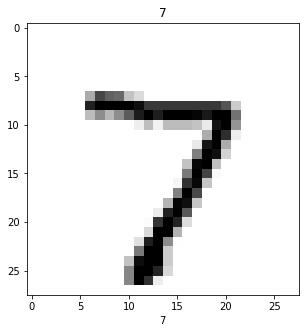

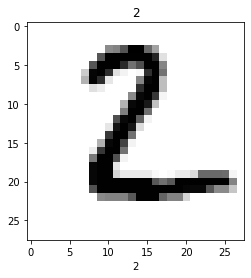

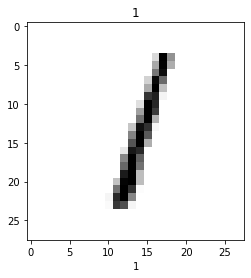

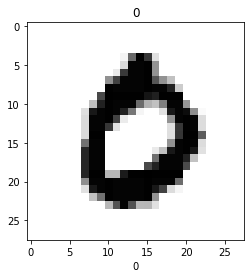

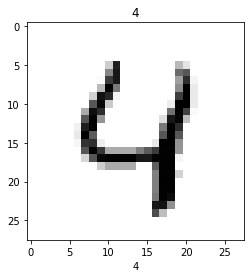

total: 10000 correct: 8931 accuracy: 0.8931000232696533


In [2]:
#digit cassification

#imports
import tensorflow as tf
from tensorflow import keras
from keras import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#get data
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.mnist.load_data(path="mnist.npz")

#split data, done in above step

#define network
model=keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),keras.layers.Dense(128,activation="relu"),keras.layers.Dense(10,activation="softmax")])

#compile the model
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

#train the network
model.fit(x_train,y_train,epochs=1)

#predict
predictions=model.predict(x_test)

#get accuracy
loss,accuracy=model.evaluate(x_test,y_test)
print(accuracy)

# plot digits
plt.figure(figsize=(5,5))
for i in range(5):
  plt.grid(False)
  plt.imshow(x_test[i], cmap=plt.cm.binary) #plots tthe digits image
  plt.xlabel(y_test[i]) #labels plot with the actual testing y data
  plt.title(np.argmax(predictions[i])) #title of plot is the prediction
  plt.show()

correct,total=0,0
for x in range(len(predictions)):
  if np.argmax(predictions[x])==y_test[x]:
    correct+=1
  total+=1

print(f"total: {total} correct: {correct} accuracy: {accuracy}")